In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.manifold import TSNE
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 16,9

In [2]:
data = pd.read_csv('processed.csv')

In [3]:
data.head()

,00,000,05,06,07,07021992,07022020,08022020,10,100,...,являюсь,являются,явно,яд,якобы,январе,января,ященко,ящик,ящика
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.104257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190169,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


На сайте Роспотребнадзора есть 11 категорий обращений, следовательно, будем разбивать данные на 11 кластеров.

Если бы у нас не было заданных категорий, то можно было бы использовать, например, кросс-валидацию (https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).

In [4]:
#topics = ['Розничная торговля', 'Общественное питание', 'Бытовое обслуживание', 'Жилищно-коммунальные услуги',
#          'Медицинские услуги', 'Транспортные услуги', 'Образовательные услуги', 'Финансовые услуги',
#          'Услуги связи', 'Туристские услуги', 'Прочие виды деятельности']

In [5]:
lda = LDA(n_components=11, random_state=42, n_jobs=-1)
lda.fit(data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=11, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [6]:
words = data.columns.values.tolist()
for i, topic in enumerate(lda.components_):
    print("\nКатегория №%d:" % (i+1))
    print(" ".join([words[j] for j in topic.argsort()[:-30 - 1:-1]]))


Категория №1:
товар заказ вернуть день деньги ооо товара магазине интернет добрый дней здравствуйте магазин это магазина заявление прошу возврат руб могу договор сайте года адрес продавец средства делать срок заказа средств

Категория №2:
огрн вывоз просьбу подключение принтер компьютера обувь интернета сша пакет одни работы предприятии упаковке оригинал отделе кпп заказом здравствуйте мед кг доставкой вес модуль техники предложений генеральный вечер оф 36

Категория №3:
ознакомиться рук уплаченных ключи товарный приказ температуры печатью справка обязательно санпин ссылка литра самом котельной случайно продаж анализы уголок грубой осмотров шесть прохождение сведения выпал отдала увидел организаций давал цех

Категория №4:
автобус водитель обращению ребёнку приложено продавать молодой должностных тр протяжении контроля добрый обязать просьба правилам собирались украшены ростовнадону общем относится италию эльдорадо выдавать снимать 38 заказать предоставили край системе проезд

Категор

In [7]:
tsne = TSNE(n_components=2, init='pca', random_state=42, n_jobs=-1)
to_plot = tsne.fit_transform(data)

In [8]:
cat = []
for i in range(len(data)):
    cat.append(np.argmax(lda.transform(data.iloc[[i]]))+1)

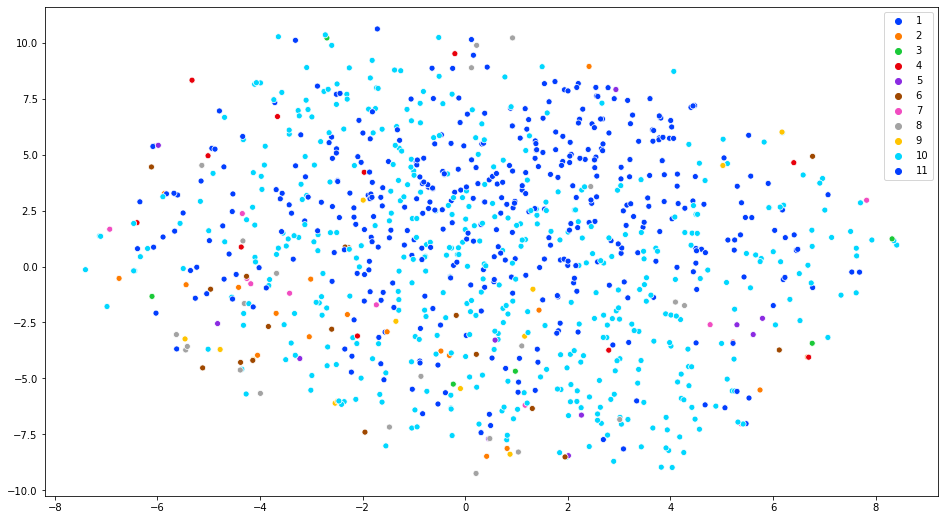

In [9]:
sns.scatterplot(to_plot[:,0], to_plot[:,1], cat, palette=sns.color_palette('bright', len(np.unique(cat))),
                legend='full')